In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

path = 'Desktop/Data/west_nile_zika/NNDSS_-_Table_II._West_Nile_to_Zika.csv'
path2 = 'Desktop/Data/west_nile_zika/tl_2017_us_state/tl_2017_us_state.shp'

In [2]:
df = pd.read_csv(path)
df.head()

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Current week","West Nile virus disease†, Neuroinvasive Current week, flag","West Nile virus disease†, Neuroinvasive Previous 52 weeks Med","West Nile virus disease†, Neuroinvasive Previous 52 weeks Med, flag","West Nile virus disease†, Neuroinvasive Previous 52 weeks Max","West Nile virus disease†, Neuroinvasive Previous 52 weeks Max, flag","West Nile virus disease†, Neuroinvasive Cum 2018",...,"Zika virus disease, non-congenital Previous 52 weeks Med","Zika virus disease, non-congenital 52 weeks Med, flag","Zika virus disease, non-congenital Previous 52 weeks Max","Zika virus disease, non-congenital Previous 52 weeks Max, flag","Zika virus disease, non-congenital Cum 2018","Zika virus disease, non-congenital Cum 2018, flag","Zika virus disease, non-congenital Cum 2017","Zika virus disease, non-congenital Cum 2017, flag",Location 1,Location 2
0,UNITED STATES,2018,1,NaN,-,2.0,NaN,140.0,NaN,NaN,...,7.0,NaN,24.0,NaN,NaN,-,17.0,NaN,NaN,NaN
1,NEW ENGLAND,2018,1,NaN,-,0.0,NaN,3.0,NaN,NaN,...,0.0,NaN,3.0,NaN,NaN,-,NaN,-,NaN,NaN
2,MID. ATLANTIC,2018,1,NaN,-,0.0,NaN,9.0,NaN,NaN,...,1.0,NaN,5.0,NaN,NaN,-,2.0,NaN,NaN,NaN
3,NEW YORK CITY,2018,1,NaN,-,0.0,NaN,5.0,NaN,NaN,...,1.0,NaN,5.0,NaN,NaN,-,2.0,NaN,NaN,NaN
4,E.N. CENTRAL,2018,1,NaN,-,0.0,NaN,30.0,NaN,NaN,...,0.0,NaN,3.0,NaN,NaN,-,2.0,NaN,NaN,NaN


In [3]:
df.tail()

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Current week","West Nile virus disease†, Neuroinvasive Current week, flag","West Nile virus disease†, Neuroinvasive Previous 52 weeks Med","West Nile virus disease†, Neuroinvasive Previous 52 weeks Med, flag","West Nile virus disease†, Neuroinvasive Previous 52 weeks Max","West Nile virus disease†, Neuroinvasive Previous 52 weeks Max, flag","West Nile virus disease†, Neuroinvasive Cum 2018",...,"Zika virus disease, non-congenital Previous 52 weeks Med","Zika virus disease, non-congenital 52 weeks Med, flag","Zika virus disease, non-congenital Previous 52 weeks Max","Zika virus disease, non-congenital Previous 52 weeks Max, flag","Zika virus disease, non-congenital Cum 2018","Zika virus disease, non-congenital Cum 2018, flag","Zika virus disease, non-congenital Cum 2017","Zika virus disease, non-congenital Cum 2017, flag",Location 1,Location 2
3211,NORTH DAKOTA,2018,48,NaN,-,0.0,NaN,10.0,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,-,NaN,-,"NORTH DAKOTA\n(47.475879, -100.121011)",NaN
3212,GUAM,2018,48,NaN,-,0.0,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,-,NaN,-,"GUAM\n(13.3532, 144.653198)",NaN
3213,PENNSYLVANIA,2018,48,NaN,-,0.0,NaN,14.0,NaN,88.0,...,0.0,NaN,0.0,NaN,NaN,-,7.0,NaN,"PENNSYLVANIA\n(40.789676, -77.858055)",NaN
3214,NORTH CAROLINA,2018,48,NaN,-,0.0,NaN,2.0,NaN,8.0,...,0.0,NaN,2.0,NaN,3.0,NaN,7.0,NaN,"NORTH CAROLINA\n(35.47995, -79.180571)",NaN
3215,ARKANSAS,2018,48,NaN,-,0.0,NaN,2.0,NaN,5.0,...,0.0,NaN,0.0,NaN,NaN,-,NaN,-,"ARKANSAS\n(34.748745, -92.275105)",NaN


In [4]:
df.columns

Index(['Reporting Area', 'MMWR Year', 'MMWR Week',
       'West Nile virus disease†, Neuroinvasive Current week',
       'West Nile virus disease†, Neuroinvasive Current week, flag ',
       'West Nile virus disease†, Neuroinvasive Previous 52 weeks Med',
       'West Nile virus disease†, Neuroinvasive Previous 52 weeks Med, flag',
       'West Nile virus disease†, Neuroinvasive Previous 52 weeks Max',
       'West Nile virus disease†, Neuroinvasive Previous 52 weeks Max, flag',
       'West Nile virus disease†, Neuroinvasive Cum 2018',
       'West Nile virus disease†, Neuroinvasive Cum 2018, flag',
       'West Nile virus disease†, Neuroinvasive Cum 2017',
       'West Nile virus disease†, Neuroinvasive Cum 2017, flag',
       'West Nile virus disease†, Nonneuroinvasive Current week',
       'West Nile virus disease†, Nonneuroinvasive Current week, flag',
       'West Nile virus disease†, Nonneuroinvasive Previous 52 weeks Med',
       'West Nile virus disease†, Nonneuroinvasive Prev

In [5]:
# Make smaller dataframe, keeping only essential columns for this analysis.
West_Nile = df[['Reporting Area', 'MMWR Year', 'MMWR Week',
               'West Nile virus disease†, Neuroinvasive Cum 2018',
               'West Nile virus disease†, Nonneuroinvasive Cum 2018',
               'West Nile virus disease†, Neuroinvasive Cum 2017',
               'West Nile virus disease†, Nonneuroinvasive Cum 2017']]
West_Nile

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017"
0,UNITED STATES,2018,1,NaN,NaN,NaN,NaN
1,NEW ENGLAND,2018,1,NaN,NaN,NaN,NaN
2,MID. ATLANTIC,2018,1,NaN,NaN,NaN,NaN
3,NEW YORK CITY,2018,1,NaN,NaN,NaN,NaN
4,E.N. CENTRAL,2018,1,NaN,NaN,NaN,NaN
5,W.N. CENTRAL,2018,1,NaN,NaN,NaN,NaN
6,S. ATLANTIC,2018,1,NaN,NaN,NaN,NaN
7,E.S. CENTRAL,2018,1,NaN,NaN,NaN,NaN
8,W.S. CENTRAL,2018,1,NaN,NaN,NaN,NaN
9,MOUNTAIN,2018,1,NaN,NaN,NaN,NaN


In [6]:
weekly = West_Nile.groupby('MMWR Week')
weekly

In [7]:
for wk, wk_df in weekly:
    print(wk)
    print(wk_df)

1
    Reporting Area  MMWR Year  MMWR Week  \
0    UNITED STATES       2018          1   
1      NEW ENGLAND       2018          1   
2    MID. ATLANTIC       2018          1   
3    NEW YORK CITY       2018          1   
4     E.N. CENTRAL       2018          1   
5     W.N. CENTRAL       2018          1   
6      S. ATLANTIC       2018          1   
7     E.S. CENTRAL       2018          1   
8     W.S. CENTRAL       2018          1   
9         MOUNTAIN       2018          1   
10         PACIFIC       2018          1   
11     AMER. SAMOA       2018          1   
12     MISSISSIPPI       2018          1   
13         INDIANA       2018          1   
14    RHODE ISLAND       2018          1   
15        MICHIGAN       2018          1   
16        MARYLAND       2018          1   
17    PENNSYLVANIA       2018          1   
18    NORTH DAKOTA       2018          1   
19          HAWAII       2018          1   
20        OKLAHOMA       2018          1   
21         WYOMING       2018 

[67 rows x 7 columns]
20
      Reporting Area  MMWR Year  MMWR Week  \
1274   UNITED STATES       2018         20   
1275     NEW ENGLAND       2018         20   
1276   MID. ATLANTIC       2018         20   
1277   NEW YORK CITY       2018         20   
1278    E.N. CENTRAL       2018         20   
1279    W.N. CENTRAL       2018         20   
1280     S. ATLANTIC       2018         20   
1281    E.S. CENTRAL       2018         20   
1282    W.S. CENTRAL       2018         20   
1283        MOUNTAIN       2018         20   
1284         PACIFIC       2018         20   
1285     AMER. SAMOA       2018         20   
1286          OREGON       2018         20   
1287        NEW YORK       2018         20   
1288    NORTH DAKOTA       2018         20   
1289   WEST VIRGINIA       2018         20   
1290          HAWAII       2018         20   
1291            GUAM       2018         20   
1292   NEW HAMPSHIRE       2018         20   
1293    RHODE ISLAND       2018         20   
1294     

[67 rows x 7 columns]
38
      Reporting Area  MMWR Year  MMWR Week  \
2479   UNITED STATES       2018         38   
2480     NEW ENGLAND       2018         38   
2481   MID. ATLANTIC       2018         38   
2482   NEW YORK CITY       2018         38   
2483    E.N. CENTRAL       2018         38   
2484    W.N. CENTRAL       2018         38   
2485     S. ATLANTIC       2018         38   
2486    E.S. CENTRAL       2018         38   
2487    W.S. CENTRAL       2018         38   
2488        MOUNTAIN       2018         38   
2489         PACIFIC       2018         38   
2490     AMER. SAMOA       2018         38   
2491          OREGON       2018         38   
2492  SOUTH CAROLINA       2018         38   
2493   MASSACHUSETTS       2018         38   
2494        NEW YORK       2018         38   
2495        MARYLAND       2018         38   
2496      NEW JERSEY       2018         38   
2497        OKLAHOMA       2018         38   
2498     MISSISSIPPI       2018         38   
2499    P

In [8]:
# Use week 48 because the data is cumulative and 48 is the latest.
West_Nile_wk48 = weekly.get_group(48)
West_Nile_wk48

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017"
3149,UNITED STATES,2018,48,1476.0,973.0,1405.0,677.0
3150,NEW ENGLAND,2018,48,62.0,13.0,10.0,5.0
3151,MID. ATLANTIC,2018,48,200.0,64.0,65.0,13.0
3152,NEW YORK CITY,2018,48,30.0,6.0,20.0,1.0
3153,E.N. CENTRAL,2018,48,274.0,96.0,192.0,49.0
3154,W.N. CENTRAL,2018,48,359.0,475.0,118.0,173.0
3155,S. ATLANTIC,2018,48,148.0,42.0,89.0,14.0
3156,E.S. CENTRAL,2018,48,58.0,45.0,110.0,53.0
3157,W.S. CENTRAL,2018,48,149.0,61.0,169.0,72.0
3158,MOUNTAIN,2018,48,99.0,109.0,241.0,142.0


In [9]:
US_total = West_Nile_wk48.iloc[0]
US_total

Reporting Area                                         UNITED STATES
MMWR Year                                                       2018
MMWR Week                                                         48
West Nile virus disease†, Neuroinvasive Cum 2018                1476
West Nile virus disease†, Nonneuroinvasive Cum 2018              973
West Nile virus disease†, Neuroinvasive Cum 2017                1405
West Nile virus disease†, Nonneuroinvasive Cum 2017              677
Name: 3149, dtype: object

In [10]:
reportingArea_title = West_Nile_wk48['Reporting Area'].str.title()
print(reportingArea_title[:5])

3149    United States
3150      New England
3151    Mid. Atlantic
3152    New York City
3153     E.N. Central
Name: Reporting Area, dtype: object


In [11]:
# Create new column with Reporting Area in title case, called 'NAME' so it can be joined to US map on this column.
West_Nile_wk48['NAME'] = reportingArea_title
West_Nile_wk48.head()

/anaconda3/envs/cc_us/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",NAME
3149,UNITED STATES,2018,48,1476.0,973.0,1405.0,677.0,United States
3150,NEW ENGLAND,2018,48,62.0,13.0,10.0,5.0,New England
3151,MID. ATLANTIC,2018,48,200.0,64.0,65.0,13.0,Mid. Atlantic
3152,NEW YORK CITY,2018,48,30.0,6.0,20.0,1.0,New York City
3153,E.N. CENTRAL,2018,48,274.0,96.0,192.0,49.0,E.N. Central


In [12]:
us = gpd.read_file(path2)
us.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39...."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"(POLYGON ((-82.987477 24.625379, -82.987477 24..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.784381 46.63050399999999, -96.78..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458..."


In [13]:
us.crs

{'init': 'epsg:4269'}

In [14]:
new_df = pd.merge(West_Nile_wk48, us, on='NAME', how='outer')
new_df

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",NAME,REGION,DIVISION,...,GEOID,STUSPS,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,UNITED STATES,2018.0,48.0,1476.0,973.0,1405.0,677.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW ENGLAND,2018.0,48.0,62.0,13.0,10.0,5.0,New England,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MID. ATLANTIC,2018.0,48.0,200.0,64.0,65.0,13.0,Mid. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEW YORK CITY,2018.0,48.0,30.0,6.0,20.0,1.0,New York City,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E.N. CENTRAL,2018.0,48.0,274.0,96.0,192.0,49.0,E.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W.N. CENTRAL,2018.0,48.0,359.0,475.0,118.0,173.0,W.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,S. ATLANTIC,2018.0,48.0,148.0,42.0,89.0,14.0,S. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E.S. CENTRAL,2018.0,48.0,58.0,45.0,110.0,53.0,E.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,W.S. CENTRAL,2018.0,48.0,149.0,61.0,169.0,72.0,W.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MOUNTAIN,2018.0,48.0,99.0,109.0,241.0,142.0,Mountain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
type(new_df)

pandas.core.frame.DataFrame

In [16]:
regional_df = new_df.iloc[1:11]
regional_df

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",NAME,REGION,DIVISION,...,GEOID,STUSPS,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1,NEW ENGLAND,2018.0,48.0,62.0,13.0,10.0,5.0,New England,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MID. ATLANTIC,2018.0,48.0,200.0,64.0,65.0,13.0,Mid. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEW YORK CITY,2018.0,48.0,30.0,6.0,20.0,1.0,New York City,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E.N. CENTRAL,2018.0,48.0,274.0,96.0,192.0,49.0,E.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W.N. CENTRAL,2018.0,48.0,359.0,475.0,118.0,173.0,W.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,S. ATLANTIC,2018.0,48.0,148.0,42.0,89.0,14.0,S. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E.S. CENTRAL,2018.0,48.0,58.0,45.0,110.0,53.0,E.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,W.S. CENTRAL,2018.0,48.0,149.0,61.0,169.0,72.0,W.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MOUNTAIN,2018.0,48.0,99.0,109.0,241.0,142.0,Mountain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,PACIFIC,2018.0,48.0,127.0,68.0,411.0,156.0,Pacific,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
regional_df.describe()

,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",ALAND,AWATER
count,10.0,10.0,10.000000,10.000000,10.000000,10.000000,0.0,0.0
mean,2018.0,48.0,150.600000,97.900000,142.500000,67.800000,NaN,NaN
std,0.0,0.0,102.900383,136.346332,119.273029,66.035008,NaN,NaN
min,2018.0,48.0,30.000000,6.000000,10.000000,1.000000,NaN,NaN
25%,2018.0,48.0,71.250000,42.750000,71.000000,13.250000,NaN,NaN
50%,2018.0,48.0,137.500000,62.500000,114.000000,51.000000,NaN,NaN
75%,2018.0,48.0,187.250000,89.000000,186.250000,124.500000,NaN,NaN
max,2018.0,48.0,359.000000,475.000000,411.000000,173.000000,NaN,NaN


In [18]:
# Calculate total number of cases by region for 2018, including both neuroninvasive and nonneuroinvasive cases.
regional_df['Total 2018'] = regional_df['West Nile virus disease†, Neuroinvasive Cum 2018'] + regional_df['West \
Nile virus disease†, Nonneuroinvasive Cum 2018']
regional_df

/anaconda3/envs/cc_us/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",NAME,REGION,DIVISION,...,STUSPS,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Total 2018
1,NEW ENGLAND,2018.0,48.0,62.0,13.0,10.0,5.0,New England,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0
2,MID. ATLANTIC,2018.0,48.0,200.0,64.0,65.0,13.0,Mid. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.0
3,NEW YORK CITY,2018.0,48.0,30.0,6.0,20.0,1.0,New York City,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4,E.N. CENTRAL,2018.0,48.0,274.0,96.0,192.0,49.0,E.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0
5,W.N. CENTRAL,2018.0,48.0,359.0,475.0,118.0,173.0,W.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.0
6,S. ATLANTIC,2018.0,48.0,148.0,42.0,89.0,14.0,S. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0
7,E.S. CENTRAL,2018.0,48.0,58.0,45.0,110.0,53.0,E.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0
8,W.S. CENTRAL,2018.0,48.0,149.0,61.0,169.0,72.0,W.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0
9,MOUNTAIN,2018.0,48.0,99.0,109.0,241.0,142.0,Mountain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0
10,PACIFIC,2018.0,48.0,127.0,68.0,411.0,156.0,Pacific,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0


In [19]:
# Calculate total number of cases by region for 2017, including both neuroninvasive and nonneuroinvasive cases.
regional_df['Total 2017'] = regional_df['West Nile virus disease†, Neuroinvasive Cum 2017'] + regional_df['West \
Nile virus disease†, Nonneuroinvasive Cum 2017']
regional_df

/anaconda3/envs/cc_us/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",NAME,REGION,DIVISION,...,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Total 2018,Total 2017
1,NEW ENGLAND,2018.0,48.0,62.0,13.0,10.0,5.0,New England,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,15.0
2,MID. ATLANTIC,2018.0,48.0,200.0,64.0,65.0,13.0,Mid. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.0,78.0
3,NEW YORK CITY,2018.0,48.0,30.0,6.0,20.0,1.0,New York City,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,21.0
4,E.N. CENTRAL,2018.0,48.0,274.0,96.0,192.0,49.0,E.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0,241.0
5,W.N. CENTRAL,2018.0,48.0,359.0,475.0,118.0,173.0,W.N. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.0,291.0
6,S. ATLANTIC,2018.0,48.0,148.0,42.0,89.0,14.0,S. Atlantic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,103.0
7,E.S. CENTRAL,2018.0,48.0,58.0,45.0,110.0,53.0,E.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,163.0
8,W.S. CENTRAL,2018.0,48.0,149.0,61.0,169.0,72.0,W.S. Central,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,241.0
9,MOUNTAIN,2018.0,48.0,99.0,109.0,241.0,142.0,Mountain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,383.0
10,PACIFIC,2018.0,48.0,127.0,68.0,411.0,156.0,Pacific,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0,567.0


In [20]:
regions = regional_df['Reporting Area'].tolist()
regions

['NEW ENGLAND',
 'MID. ATLANTIC',
 'NEW YORK CITY',
 'E.N. CENTRAL',
 'W.N. CENTRAL',
 'S. ATLANTIC',
 'E.S. CENTRAL',
 'W.S. CENTRAL',
 'MOUNTAIN',
 'PACIFIC']

In [21]:
type(regions)

list

In [22]:
xpos = np.arange(len(regions))
xpos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
nni2018_by_region = regional_df['West Nile virus disease†, Nonneuroinvasive Cum 2018'] # nni for Nonneuroinvasive
nni2018_by_region

1      13.0
2      64.0
3       6.0
4      96.0
5     475.0
6      42.0
7      45.0
8      61.0
9     109.0
10     68.0
Name: West Nile virus disease†, Nonneuroinvasive Cum 2018, dtype: float64

In [24]:
type(nni2018_by_region)

pandas.core.series.Series

In [25]:
nni2018_list = nni2018_by_region.tolist()
nni2018_list

[13.0, 64.0, 6.0, 96.0, 475.0, 42.0, 45.0, 61.0, 109.0, 68.0]

In [26]:
nni2017_by_region = regional_df['West Nile virus disease†, Nonneuroinvasive Cum 2017']
nni2017_by_region

1       5.0
2      13.0
3       1.0
4      49.0
5     173.0
6      14.0
7      53.0
8      72.0
9     142.0
10    156.0
Name: West Nile virus disease†, Nonneuroinvasive Cum 2017, dtype: float64

In [27]:
nni2017_list = nni2017_by_region.tolist()
nni2017_list

[5.0, 13.0, 1.0, 49.0, 173.0, 14.0, 53.0, 72.0, 142.0, 156.0]

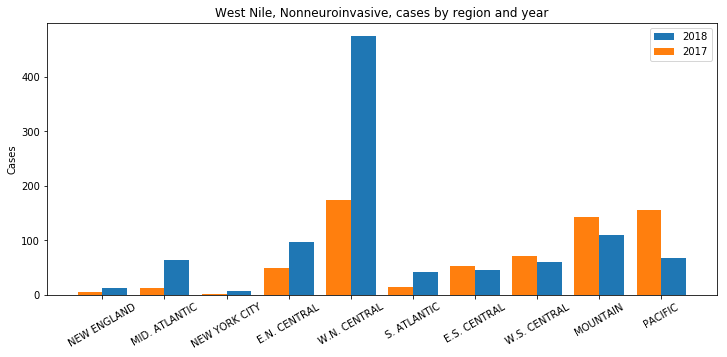

In [28]:
# Create bar chart of counts of nonneuroinvasive cases by region and year.
plt.rcParams["figure.figsize"]=(12, 5)
plt.xticks(xpos, regions, rotation=30)
plt.ylabel('Cases')
plt.bar(xpos+0.2, nni2018_list, width=0.4, label="2018")
plt.bar(xpos-0.2, nni2017_list, width=0.4, label="2017")
plt.title('West Nile, Nonneuroinvasive, cases by region and year')
plt.legend()

In [29]:
ni2018_by_region = regional_df['West Nile virus disease†, Neuroinvasive Cum 2018'] # ni for neuroinvasive
ni2018_by_region

1      62.0
2     200.0
3      30.0
4     274.0
5     359.0
6     148.0
7      58.0
8     149.0
9      99.0
10    127.0
Name: West Nile virus disease†, Neuroinvasive Cum 2018, dtype: float64

In [30]:
ni2018_list = ni2018_by_region.to_list()
ni2018_list

[62.0, 200.0, 30.0, 274.0, 359.0, 148.0, 58.0, 149.0, 99.0, 127.0]

In [31]:
# Get counts of neuroinvasive cases by region for 2017
ni2017_by_region = regional_df['West Nile virus disease†, Neuroinvasive Cum 2017']
ni2017_by_region

1      10.0
2      65.0
3      20.0
4     192.0
5     118.0
6      89.0
7     110.0
8     169.0
9     241.0
10    411.0
Name: West Nile virus disease†, Neuroinvasive Cum 2017, dtype: float64

In [32]:
ni2017_list = ni2017_by_region.to_list()
ni2017_list

[10.0, 65.0, 20.0, 192.0, 118.0, 89.0, 110.0, 169.0, 241.0, 411.0]

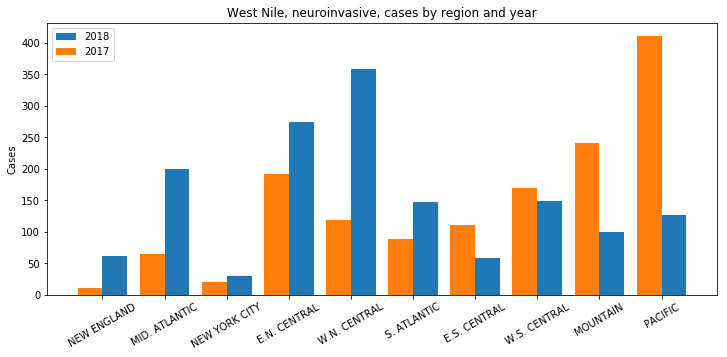

In [33]:
# Create bar chart of counts of neuroinvasive cases by region and year.
plt.rcParams["figure.figsize"]=(12, 5)
plt.xticks(xpos, regions, rotation=30)
plt.ylabel('Cases')
plt.bar(xpos+0.2, ni2018_list, width=0.4, label="2018")
plt.bar(xpos-0.2, ni2017_list, width=0.4, label="2017")
plt.title('West Nile, neuroinvasive, cases by region and year')
plt.legend()

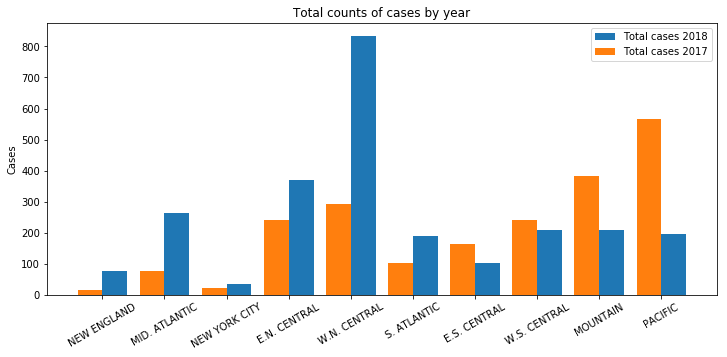

In [34]:
# Create bar chart of total counts of cases, both neuroinvasive and nonneuroinvasive, by region and year.
plt.rcParams["figure.figsize"]=(12, 5)
plt.xticks(xpos, regions, rotation=30)
plt.ylabel('Cases')
plt.bar(xpos+0.2, regional_df['Total 2018'], width=0.4, label="Total cases 2018")
plt.bar(xpos-0.2, regional_df['Total 2017'], width=0.4, label="Total cases 2017")
plt.title('Total counts of cases by year')
plt.legend()

In [35]:
new_df_small = new_df[['Reporting Area', 'MMWR Year', 'MMWR Week',
                      'West Nile virus disease†, Neuroinvasive Cum 2018',
                      'West Nile virus disease†, Nonneuroinvasive Cum 2018',
                      'West Nile virus disease†, Neuroinvasive Cum 2017',
                      'West Nile virus disease†, Nonneuroinvasive Cum 2017',
                      'NAME']]
new_df_small

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",NAME
0,UNITED STATES,2018.0,48.0,1476.0,973.0,1405.0,677.0,United States
1,NEW ENGLAND,2018.0,48.0,62.0,13.0,10.0,5.0,New England
2,MID. ATLANTIC,2018.0,48.0,200.0,64.0,65.0,13.0,Mid. Atlantic
3,NEW YORK CITY,2018.0,48.0,30.0,6.0,20.0,1.0,New York City
4,E.N. CENTRAL,2018.0,48.0,274.0,96.0,192.0,49.0,E.N. Central
5,W.N. CENTRAL,2018.0,48.0,359.0,475.0,118.0,173.0,W.N. Central
6,S. ATLANTIC,2018.0,48.0,148.0,42.0,89.0,14.0,S. Atlantic
7,E.S. CENTRAL,2018.0,48.0,58.0,45.0,110.0,53.0,E.S. Central
8,W.S. CENTRAL,2018.0,48.0,149.0,61.0,169.0,72.0,W.S. Central
9,MOUNTAIN,2018.0,48.0,99.0,109.0,241.0,142.0,Mountain


In [36]:
us_states = new_df_small.iloc[12:]
us_states

,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017",NAME
12,SOUTH DAKOTA,2018.0,48.0,47.0,121.0,27.0,46.0,South Dakota
13,HAWAII,2018.0,48.0,NaN,NaN,NaN,NaN,Hawaii
14,WISCONSIN,2018.0,48.0,26.0,1.0,47.0,4.0,Wisconsin
15,LOUISIANA,2018.0,48.0,42.0,22.0,38.0,15.0,Louisiana
16,TEXAS,2018.0,48.0,90.0,31.0,84.0,46.0,Texas
17,VIRGINIA,2018.0,48.0,37.0,10.0,12.0,1.0,Virginia
18,SOUTH CAROLINA,2018.0,48.0,11.0,3.0,16.0,2.0,South Carolina
19,NEW HAMPSHIRE,2018.0,48.0,NaN,NaN,NaN,1.0,New Hampshire
20,TENNESSEE,2018.0,48.0,11.0,2.0,20.0,10.0,Tennessee
21,DELAWARE,2018.0,48.0,8.0,2.0,NaN,1.0,Delaware


In [37]:
type(us_states)

pandas.core.frame.DataFrame

In [38]:
# Do attribute join of us_states with us.
us_states_merged = us.merge(us_states, on='NAME') 
us_states_merged

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,...,INTPTLAT,INTPTLON,geometry,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017"
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,...,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39....",WEST VIRGINIA,2018.0,48.0,1.0,NaN,1.0,NaN
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,...,+28.4574302,-082.4091478,"(POLYGON ((-82.987477 24.625379, -82.987477 24...",FLORIDA,2018.0,48.0,15.0,4.0,4.0,1.0
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,...,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64...",ILLINOIS,2018.0,48.0,100.0,45.0,72.0,18.0
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,...,+46.3158148,-094.1996628,"POLYGON ((-96.784381 46.63050399999999, -96.78...",MINNESOTA,2018.0,48.0,34.0,28.0,13.0,17.0
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,...,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458...",MARYLAND,2018.0,48.0,33.0,11.0,3.0,2.0
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,...,+41.5974187,-071.5272723,"(POLYGON ((-71.67880699999999 41.158912, -71.6...",RHODE ISLAND,2018.0,48.0,NaN,1.0,1.0,1.0
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,...,+44.3484222,-114.5588538,"POLYGON ((-116.899711 44.840609, -116.89967 44...",IDAHO,2018.0,48.0,10.0,6.0,16.0,9.0
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,...,+43.6726907,-071.5843145,"POLYGON ((-72.329899 43.600214, -72.329838 43....",NEW HAMPSHIRE,2018.0,48.0,NaN,NaN,NaN,1.0
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,...,+35.5397100,-079.1308636,"POLYGON ((-82.416738 36.072827, -82.416601 36....",NORTH CAROLINA,2018.0,48.0,8.0,NaN,8.0,NaN
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,...,+44.0604795,-072.6733274,"POLYGON ((-73.313283 44.26413, -73.312741 44.2...",VERMONT,2018.0,48.0,1.0,NaN,2.0,1.0


In [39]:
us_states_merged.dropna(inplace=True)
us_states_merged

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,...,INTPTLAT,INTPTLON,geometry,Reporting Area,MMWR Year,MMWR Week,"West Nile virus disease†, Neuroinvasive Cum 2018","West Nile virus disease†, Nonneuroinvasive Cum 2018","West Nile virus disease†, Neuroinvasive Cum 2017","West Nile virus disease†, Nonneuroinvasive Cum 2017"
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,...,+28.4574302,-082.4091478,"(POLYGON ((-82.987477 24.625379, -82.987477 24...",FLORIDA,2018.0,48.0,15.0,4.0,4.0,1.0
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,...,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64...",ILLINOIS,2018.0,48.0,100.0,45.0,72.0,18.0
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,...,+46.3158148,-094.1996628,"POLYGON ((-96.784381 46.63050399999999, -96.78...",MINNESOTA,2018.0,48.0,34.0,28.0,13.0,17.0
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,...,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458...",MARYLAND,2018.0,48.0,33.0,11.0,3.0,2.0
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,...,+44.3484222,-114.5588538,"POLYGON ((-116.899711 44.840609, -116.89967 44...",IDAHO,2018.0,48.0,10.0,6.0,16.0,9.0
10,1,1,09,01779780,09,CT,Connecticut,00,G4000,A,...,+41.5798637,-072.7466572,"POLYGON ((-73.51808 41.666723, -73.51807099999...",CONNECTICUT,2018.0,48.0,18.0,5.0,2.0,1.0
12,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,...,+34.4346843,-106.1316181,"POLYGON ((-106.006316 36.995267, -106.005314 3...",NEW MEXICO,2018.0,48.0,4.0,1.0,23.0,10.0
13,4,9,06,01779778,06,CA,California,00,G4000,A,...,+37.1551773,-119.5434183,"(POLYGON ((-119.636068 33.280713, -119.634795 ...",CALIFORNIA,2018.0,48.0,122.0,67.0,398.0,150.0
14,1,2,34,01779795,34,NJ,New Jersey,00,G4000,A,...,+40.1072744,-074.6652012,"POLYGON ((-75.1896 40.591776, -75.189765999999...",NEW JERSEY,2018.0,48.0,43.0,18.0,6.0,2.0
15,2,3,55,01779806,55,WI,Wisconsin,00,G4000,A,...,+44.6309071,-089.7093916,"POLYGON ((-92.887067 45.644148, -92.886712 45....",WISCONSIN,2018.0,48.0,26.0,1.0,47.0,4.0


In [40]:
us_states_merged.shape

(38, 22)

Text(0.5, 1.0, 'West Nile virus cases, neuroinvasive, 2018')

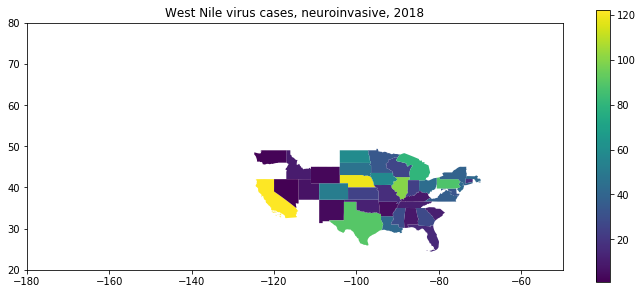

In [41]:
# Make chloropleth map of neuroinvasive cases of West Nile virus for 2018.
fig, ax = plt.subplots()
ax.set(xlim=(-180,-50), ylim=(20,80)) # Set limits to focus on continental U.S.
us_states_merged.plot(ax=ax, column='West Nile virus disease†, Neuroinvasive Cum 2018', legend=True)
plt.title('West Nile virus cases, neuroinvasive, 2018')

Text(0.5, 1.0, 'West Nile virus cases, neuroinvasive, 2017')

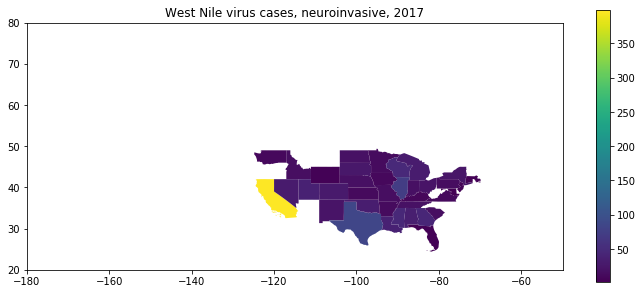

In [42]:
# Make chloropleth map of neuroinvasive cases of West Nile virus for 2017.
fig, ax = plt.subplots()
ax.set(xlim=(-180,-50), ylim=(20,80)) # Set limits to focus on continental U.S.
us_states_merged.plot(ax=ax, column='West Nile virus disease†, Neuroinvasive Cum 2017', legend=True)
plt.title('West Nile virus cases, neuroinvasive, 2017')

Text(0.5, 1.0, 'West Nile virus cases, nonneuroinvasive, 2018')

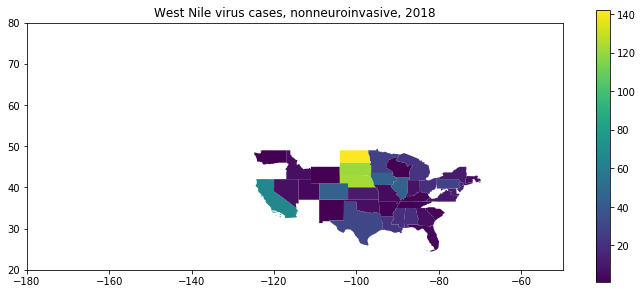

In [43]:
# Make chloropleth map of nonneuroinvasive cases of West Nile virus for 2018.
fig, ax = plt.subplots()
ax.set(xlim=(-180,-50), ylim=(20,80)) # Set limits to focus on continental U.S.
us_states_merged.plot(ax=ax, column='West Nile virus disease†, Nonneuroinvasive Cum 2018', legend=True)
plt.title('West Nile virus cases, nonneuroinvasive, 2018')

Text(0.5, 1.0, 'West Nile virus cases, nonneuroinvasive, 2017')

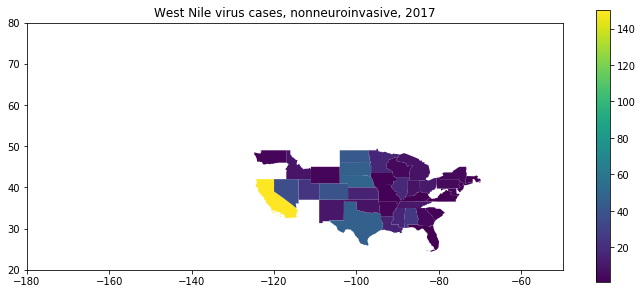

In [44]:
# Make chloropleth map of nonneuroinvasive cases of West Nile virus for 2017.
fig, ax = plt.subplots()
ax.set(xlim=(-180,-50), ylim=(20,80)) # Set limits to focus on continental U.S.
us_states_merged.plot(ax=ax, column='West Nile virus disease†, Nonneuroinvasive Cum 2017', legend=True)
plt.title('West Nile virus cases, nonneuroinvasive, 2017')